In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\california.csv", index_col = 0)

In [36]:
df.head(5)

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
0,44060,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN,100.0
1,96093,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667,7.0
2,43333,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111,5.0
3,21885,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,38.0
4,190108,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000,5.0


In [4]:
df.shape

(3993, 11)

In [39]:
df.duplicated(subset=["id"]).sum()

0

In [5]:
df.isnull().sum()

id                           0
state                        9
gender                       0
median_home_val            200
median_household_income    120
ic2                          8
ic3                         80
ic4                         40
ic5                        399
avggift                    280
target_d                     0
dtype: int64

In [6]:
df["gender"].unique()

array(['M', 'F', 'female', 'Male', 'U', 'J', 'male', 'Female', 'feamale',
       'A'], dtype=object)

In [7]:
f = ['female','Female','feamale']
m = ['Male','male']

for i in f:
    df["gender"] = df["gender"].str.replace(i, 'F')
for i in m:
    df["gender"] = df["gender"].str.replace(i,'M')

In [8]:
df["gender"].unique()

array(['M', 'F', 'U', 'J', 'A'], dtype=object)

In [9]:
df["gender"].value_counts()

F    2276
M    1625
U      68
J      23
A       1
Name: gender, dtype: int64

In [10]:
df["gender"].value_counts()[0]+df["gender"].value_counts()[1]

3901

In [11]:
g = ['U','J','A']

for i in g:
    df.drop(df[df["gender"] == i].index, inplace=True)

In [12]:
df["gender"].value_counts()

F    2276
M    1625
Name: gender, dtype: int64

In [13]:
df["state"].unique()

array(['FL', 'IL', 'NC', nan, 'NV', 'CA', 'Cali', 'AP', 'MI', 'MT', 'TX',
       'WI', 'MO', 'IN', 'HI', 'UT', 'GA', 'WA', 'CT', 'ND', 'SC', 'IA',
       'CO', 'LA', 'OR', 'SD', 'AL', 'TN', 'NM', 'AZ', 'MN', 'KY', 'OK',
       'NE', 'AR', 'KS', 'ID', 'California', 'MS', 'NY', 'Arizona', 'WY',
       'Tennessee', 'MD', 'AK', 'VA', 'AE', 'NJ', 'AA', 'PA', 'VT', 'WV',
       'GU'], dtype=object)

In [14]:
df["state"] = df["state"].str.replace('California', 'CA')
df["state"] = df["state"].str.replace('Cali', 'CA')
df["state"] = df["state"].str.replace('Arizona', 'AZ')
df["state"] = df["state"].str.replace('Tennessee', 'TN')


In [15]:
df["state"].unique()

array(['FL', 'IL', 'NC', nan, 'NV', 'CA', 'AP', 'MI', 'MT', 'TX', 'WI',
       'MO', 'IN', 'HI', 'UT', 'GA', 'WA', 'CT', 'ND', 'SC', 'IA', 'CO',
       'LA', 'OR', 'SD', 'AL', 'TN', 'NM', 'AZ', 'MN', 'KY', 'OK', 'NE',
       'AR', 'KS', 'ID', 'MS', 'NY', 'WY', 'MD', 'AK', 'VA', 'AE', 'NJ',
       'AA', 'PA', 'VT', 'WV', 'GU'], dtype=object)

In [16]:
df.isnull().sum()

id                           0
state                        8
gender                       0
median_home_val            196
median_household_income    118
ic2                          8
ic3                         77
ic4                         40
ic5                        391
avggift                    271
target_d                     0
dtype: int64

In [17]:
df.dropna(subset = ['state', 'ic2', 'ic3', 'ic4'], inplace = True)

In [18]:
df.isnull().sum()

id                           0
state                        0
gender                       0
median_home_val            194
median_household_income    116
ic2                          0
ic3                          0
ic4                          0
ic5                        375
avggift                    258
target_d                     0
dtype: int64

In [19]:
df_numericas = df.select_dtypes(include=np.number)

In [22]:
df_numericas = df_numericas.drop(['id', 'target_d'], axis = 1)

In [23]:
df_numericas.head(5)

,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift
0,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667
2,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111
3,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778
4,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000


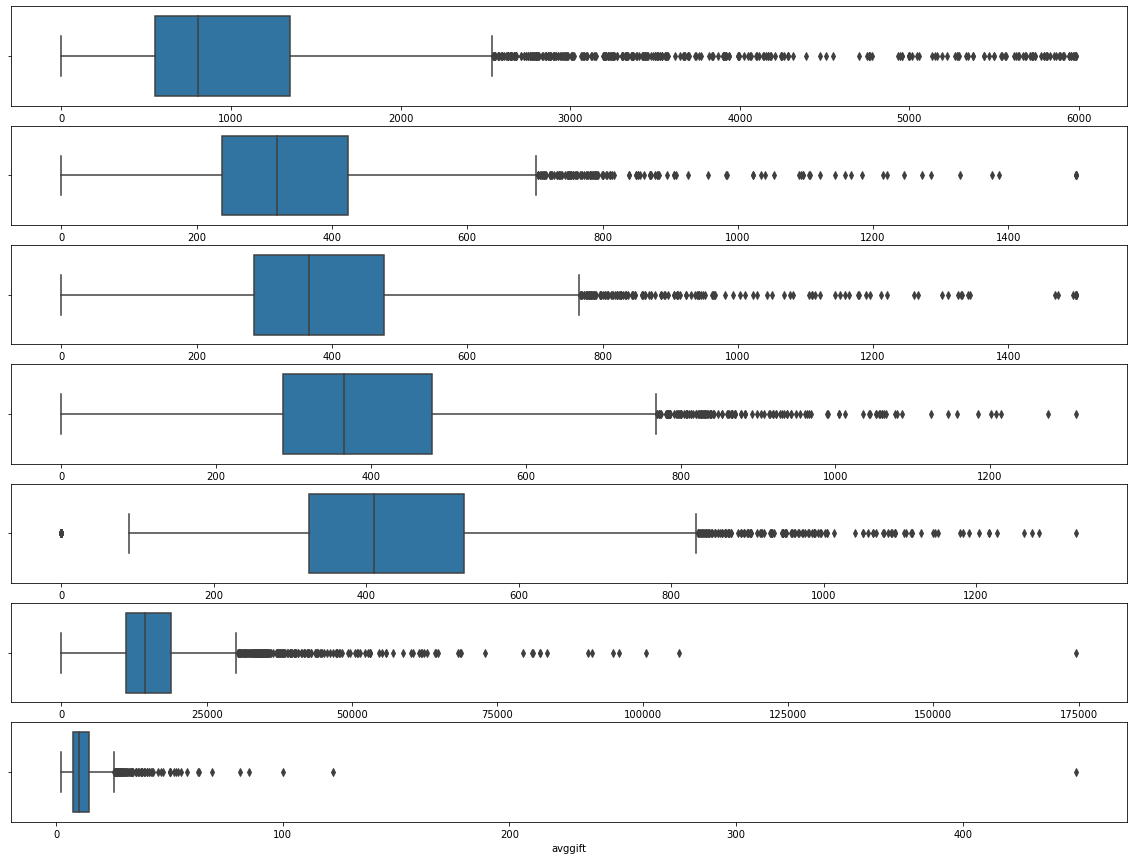

In [24]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [25]:
df["avggift"].max()

450.0

In [28]:
def outliers(col):
    q1 = np.nanpercentile(df[col], 25)
    q3 = np.nanpercentile(df[col], 75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    return q1, q3, outlier_step

In [33]:

outliers_data = df[(df['avggift'] < outliers('avggift')[0] - outliers('avggift')[2]) | (df['avggift'] > outliers('avggift')[1] + outliers('avggift')[2])]

In [35]:
outliers_data.shape

(99, 11)